In [1]:
# Dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


In [2]:
# Navigate to config file
orig_working_directory = os.getcwd()
os.chdir(os.path.join('..','..'))
curr_working_directory = os.getcwd()
os.getcwd()

#import password for postgreSQL
from config import postgresql_password

In [3]:
# Create Engine
engine = create_engine(f"postgresql+psycopg2://postgres:{postgresql_password}@/Employee_Case_Study_db")
connection = engine.connect()


In [4]:
# Query all records in the the Database
employee = pd.read_sql("SELECT * FROM employee", connection)
salaries = pd.read_sql("SELECT * FROM salaries", connection)
title = pd.read_sql("SELECT * FROM title", connection)


In [5]:
#convert salaries to integer
salaries['salary'] = pd.to_numeric(salaries['salary'])
salaries.dtypes

emp_no    object
salary     int64
dtype: object

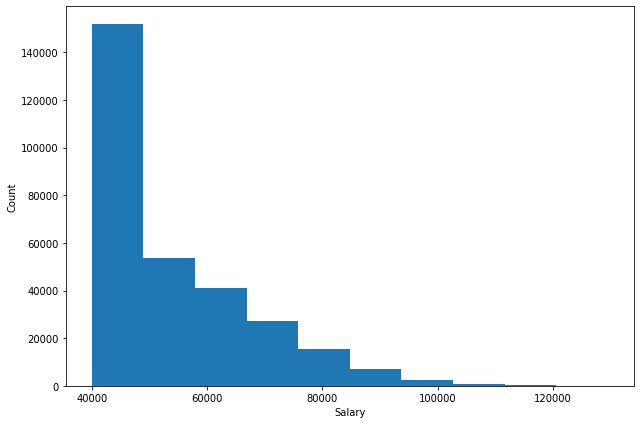

In [6]:
#Create a histogram to visualize the most common salary ranges for employees.
fig, ax = plt.subplots(figsize=(9,6))
plt.hist(salaries['salary'],10)
plt.ylabel("Count")
plt.xlabel("Salary")
plt.tight_layout()

In [7]:
#merge employee, salaries and title tables
employee_title = pd.merge(employee, title, left_on='emp_title', right_on='title_id')
emp_title_salary = pd.merge(employee_title, salaries, on='emp_no')

#Find average salary by title
title_grouped = emp_title_salary.groupby('title')
avg_salary_by_title = title_grouped['salary'].mean()
avg_salary_by_title_df = avg_salary_by_title.to_frame()
avg_salary_by_title_df = avg_salary_by_title_df.reset_index()
avg_salary_by_title_df

,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


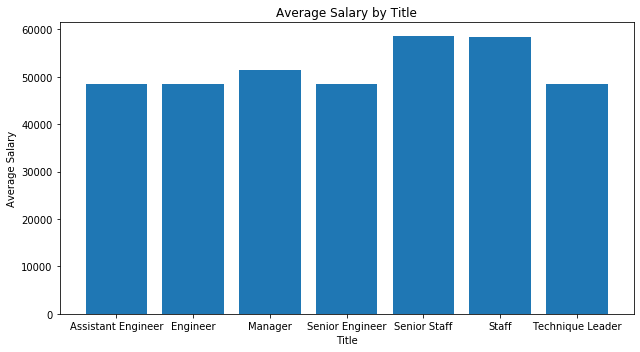

In [10]:
#Create a bar chart of average salary by title
fig, ax = plt.subplots(figsize=(9,5))
plt.bar(avg_salary_by_title_df['title'], avg_salary_by_title_df['salary'])
plt.title("Average Salary by Title")
plt.ylabel("Average Salary")
plt.xlabel("Title")
plt.tight_layout()

In [9]:
#find salary for employee number 499942
emp_499942 = salaries.loc[salaries['emp_no'] == '499942', :]
emp_499942

,emp_no,salary
299966,499942,40000
